In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
%matplotlib inline
%config inlinebackend.figure_format='svg'


In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.shape

(10000, 20)

In [5]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [6]:
data.iloc[:,:31].head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524


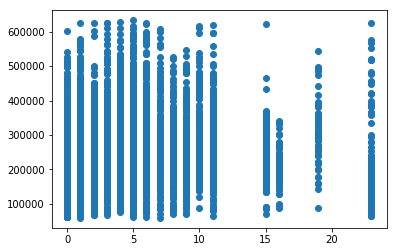

In [7]:
plt.scatter(data['Shops_1'],data['Price'])

In [8]:
df_index  = data.loc[data['Shops_1']>3019].index

In [9]:
df_index

Int64Index([], dtype='int64')

data.drop(df_index,axis=0,inplace=True)

data.to_csv('train_clear.csv')

In [10]:
data_clear=pd.read_csv('train_clear1.csv',sep=';')

In [11]:
data_clear.iloc[:,:31].head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2,47.981561,29.442751,6,7,9,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.9307
1,15053,41,3,65.683640,40.049543,8,7,9,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.4501
2,4765,53,2,44.947953,29.197612,0,8,12,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.9085


In [12]:
data_clear.shape

(9913, 20)

In [13]:
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9913 entries, 0 to 9912
Data columns (total 20 columns):
Id               9913 non-null int64
DistrictId       9913 non-null int64
Rooms            9913 non-null int64
Square           9913 non-null float64
LifeSquare       7802 non-null float64
KitchenSquare    9913 non-null int64
Floor            9913 non-null int64
HouseFloor       9913 non-null int64
HouseYear        9913 non-null int64
Ecology_1        9913 non-null float64
Ecology_2        9913 non-null int64
Ecology_3        9913 non-null int64
Social_1         9913 non-null int64
Social_2         9913 non-null int64
Social_3         9913 non-null int64
Healthcare_1     5158 non-null float64
Helthcare_2      9913 non-null int64
Shops_1          9913 non-null int64
Shops_2          9913 non-null int64
Price            9913 non-null float64
dtypes: float64(5), int64(15)
memory usage: 1.5 MB


In [14]:
data_clear.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,9913.000000,9913.000000,9913.000000,9913.000000,7802.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,9913.000000,5158.000000,9913.000000,9913.000000,9913.000000,9913.000000
mean,8382.423989,50.407243,1.885907,55.849315,35.599392,5.703420,8.502068,12.530314,1984.721578,0.119090,0.990215,0.972965,24.711389,5355.575103,7.958338,1142.981000,1.314738,4.221729,0.917684,213638.209198
std,4857.915839,43.636551,0.811039,18.399336,16.517645,3.994019,5.181533,6.441213,18.352133,0.119160,0.098440,0.162194,17.534295,4006.885703,23.624124,1021.949773,1.488048,4.786004,0.274860,92235.293322
min,0.000000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778030
25%,4166.000000,19.000000,1.000000,41.740799,22.720399,1.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153808.642700
50%,8396.000000,36.000000,2.000000,52.356269,32.657097,6.000000,7.000000,13.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192022.684600
75%,12592.000000,75.000000,2.000000,65.786021,44.917857,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,248648.730000
max,16798.000000,209.000000,5.000000,190.857689,118.986655,40.000000,28.000000,30.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466600


In [15]:
data_clear.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,1.000000,0.013121,-0.006145,-0.004354,-0.004127,0.014222,0.002511,-0.006134,0.004099,0.017297,0.003093,-0.005796,-0.001678,-0.002826,-0.007377,-0.004178,0.001205,-0.007859,0.004586,0.009315
DistrictId,0.013121,1.000000,0.077007,-0.027737,-0.062989,0.244466,-0.123473,-0.157527,-0.202475,0.064061,-0.093699,-0.029476,0.247281,0.168084,0.139152,0.304043,0.307341,0.175241,-0.021161,0.268122
Rooms,-0.006145,0.077007,1.000000,0.779301,0.629425,0.129985,-0.001876,-0.028316,-0.046335,-0.030516,-0.002612,-0.006578,0.077892,0.072082,0.015459,0.041947,0.067291,0.055329,-0.000498,0.575995
Square,-0.004354,-0.027737,0.779301,1.000000,0.742127,0.091034,0.122227,0.085228,0.183535,-0.068971,0.031883,0.034056,-0.076487,-0.047263,0.014447,-0.046252,-0.039050,0.006899,-0.057668,0.587153
LifeSquare,-0.004127,-0.062989,0.629425,0.742127,1.000000,-0.041160,0.111751,0.100855,0.183354,-0.061778,0.025216,0.034844,-0.144140,-0.110777,0.038935,-0.042749,-0.076899,-0.008045,-0.035535,0.413654
KitchenSquare,0.014222,0.244466,0.129985,0.091034,-0.041160,1.000000,-0.022819,0.169162,0.166240,0.028795,-0.012257,-0.066575,0.375135,0.340249,-0.066866,0.119225,0.204725,0.113367,0.038046,0.303117
Floor,0.002511,-0.123473,-0.001876,0.122227,0.111751,-0.022819,1.000000,0.421559,0.284392,-0.015193,0.049982,0.033559,-0.048601,-0.019816,-0.008832,-0.139334,-0.076957,0.018940,-0.017448,0.125640
HouseFloor,-0.006134,-0.157527,-0.028316,0.085228,0.100855,0.169162,0.421559,1.000000,0.407628,-0.000423,0.061487,0.026085,-0.024449,0.004416,-0.027729,-0.161481,-0.091054,0.014502,0.048365,0.079445
HouseYear,0.004099,-0.202475,-0.046335,0.183535,0.183354,0.166240,0.284392,0.407628,1.000000,-0.063987,0.076619,0.049803,-0.046313,0.015362,-0.053950,-0.207090,-0.120857,-0.003593,-0.058045,0.030721
Ecology_1,0.017297,0.064061,-0.030516,-0.068971,-0.061778,0.028795,-0.015193,-0.000423,-0.063987,1.000000,-0.110894,-0.225203,0.025902,0.008849,-0.122329,-0.044293,0.031961,-0.075741,0.079790,-0.057793


In [19]:
data1 = data_clear.drop('Healthcare_1',axis=1)

In [20]:
feature_names=('Rooms','Square','LifeSquare','KitchenSquare')

In [160]:
X = pd.DataFrame(data1, columns=feature_names)
X.head()

,Rooms,Square,LifeSquare,KitchenSquare
0,2,47.981561,29.442751,6
1,3,65.683640,40.049543,8
2,2,44.947953,29.197612,0
3,2,53.352981,52.731512,9
4,1,39.649192,23.776169,7


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9913 entries, 0 to 9912
Data columns (total 4 columns):
Rooms            9913 non-null int64
Square           9913 non-null float64
LifeSquare       7802 non-null float64
KitchenSquare    9913 non-null int64
dtypes: float64(2), int64(2)
memory usage: 309.9 KB


In [161]:
y = pd.DataFrame(data1, columns=["Price"])

y.head()

,Price
0,184966.9307
1,300009.4501
2,220925.9085
3,175616.2272
4,150226.5316


In [101]:
y1 = ((X[['LifeSquare']][X.LifeSquare>0]).values)
y1 = pd.DataFrame(y1)
y1.info()
y1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7802 entries, 0 to 7801
Data columns (total 1 columns):
0    7802 non-null float64
dtypes: float64(1)
memory usage: 61.0 KB


,0
0,29.442751
1,40.049543
2,29.197612
3,52.731512
4,23.776169


In [102]:
X1=((X[['Square']][X.LifeSquare>0]).values)
X1 = pd.DataFrame(X1)
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7802 entries, 0 to 7801
Data columns (total 1 columns):
0    7802 non-null float64
dtypes: float64(1)
memory usage: 61.0 KB


In [103]:
X1.rename(columns={'0':'Square'})
X1.head()


,0
0,47.981561
1,65.683640
2,44.947953
3,53.352981
4,39.649192


In [104]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25)

In [119]:
y1.head()

,0
0,29.442751
1,40.049543
2,29.197612
3,52.731512
4,23.776169


In [106]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [107]:
lr.fit(X1_train, y1_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [139]:
X2=((X[['Square']]).values)
X2 = pd.DataFrame({"fact":X2.flatten()})
X2.info()
y2_pred = lr.predict(X2)

y2_pred.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9913 entries, 0 to 9912
Data columns (total 1 columns):
fact    9913 non-null float64
dtypes: float64(1)
memory usage: 77.5 KB


(9913, 1)

In [171]:
X['LifeSquare']=y2_pred

In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9913 entries, 0 to 9912
Data columns (total 4 columns):
Rooms            9913 non-null int64
Square           9913 non-null float64
LifeSquare       9913 non-null float64
KitchenSquare    9913 non-null int64
dtypes: float64(2), int64(2)
memory usage: 309.9 KB


In [173]:
X.corr()

,Rooms,Square,LifeSquare,KitchenSquare
Rooms,1.000000,0.779301,0.779301,0.129985
Square,0.779301,1.000000,1.000000,0.091034
LifeSquare,0.779301,1.000000,1.000000,0.091034
KitchenSquare,0.129985,0.091034,0.091034,1.000000


In [203]:
test =pd.read_csv('test.csv')

In [204]:
X_aim = pd.DataFrame(test, columns=feature_names)
X_aim.head()

,Rooms,Square,LifeSquare,KitchenSquare
0,2.0,49.882643,33.432782,6.0
1,2.0,69.263183,NaN,1.0
2,1.0,13.597819,15.948246,12.0
3,2.0,73.046609,51.940842,9.0
4,1.0,47.527111,43.387569,1.0


In [207]:
y3 = ((X_aim[['LifeSquare']][X_aim.LifeSquare>0]).values)
y3 = pd.DataFrame(y3)
y3.info()
y3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 1 columns):
0    3959 non-null float64
dtypes: float64(1)
memory usage: 31.0 KB


,0
0,33.432782
1,15.948246
2,51.940842
3,43.387569
4,64.843025


In [208]:
X3=((X_aim[['Square']][X_aim.LifeSquare>0]).values)
X3 = pd.DataFrame(X3)
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 1 columns):
0    3959 non-null float64
dtypes: float64(1)
memory usage: 31.0 KB


In [209]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25)

In [210]:
from sklearn.linear_model import LinearRegression
lr3 = LinearRegression()

In [211]:
lr3.fit(X3_train, y3_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [212]:
X4=((X_aim[['Square']]).values)
X4 = pd.DataFrame({"fact":X4.flatten()})
X4.info()
y4_pred = lr3.predict(X4)

y4_pred.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
fact    5000 non-null float64
dtypes: float64(1)
memory usage: 39.1 KB


(5000, 1)

In [213]:
X_aim['LifeSquare']=y4_pred

In [214]:
X_aim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
dtypes: float64(4)
memory usage: 156.3 KB


In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [176]:
from sklearn.linear_model import LinearRegression

In [223]:
lr4 = LinearRegression()
X_train.head()

,Rooms,Square,LifeSquare,KitchenSquare
27,2,64.556209,42.384492,1
4290,2,56.334792,36.749500,8
6279,1,38.309825,24.395115,10
3658,1,38.718684,24.675348,7
5281,2,59.162890,38.687890,11


In [230]:
lr4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [231]:
y_pred = lr4.predict(X_test)

y_pred.shape

(2479, 1)

In [232]:
check_test = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
1677,315753.0383,271888.0
9734,185030.5835,145632.0
7597,449776.1044,285616.0
275,175868.0820,199600.0
2578,245847.9810,240864.0
7166,135953.3986,132320.0
5040,268191.6151,246496.0
8906,107067.4276,148960.0
9110,177116.3397,171232.0
849,344513.1191,236352.0


In [233]:
from sklearn.metrics import mean_squared_error

mean_squared_error(check_test["y_pred"], check_test["y_test"])

4846432910.78741

In [234]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(check_test["y_pred"], check_test["y_test"])

47608.51236597418

In [235]:
y_aim1 = lr4.predict(X_aim)

X_aim.head()

,Rooms,Square,LifeSquare,KitchenSquare
0,2.0,49.882643,32.527410,6.0
1,2.0,69.263183,45.513902,1.0
2,1.0,13.597819,8.213712,12.0
3,2.0,73.046609,48.049096,9.0
4,1.0,47.527111,30.949017,1.0


In [236]:
pd.DataFrame(y_aim1).head()

,0
0,-1.321874e+16
1,6.388216e+15
2,-4.992746e+16
3,1.021584e+16
4,-1.560179e+16


In [237]:
pd.DataFrame(y_aim1).to_csv('y_aim1.csv')

PermissionError: [Errno 13] Permission denied: 'y_aim1.csv'

In [184]:
lr.intercept_

array([-1.22958878e+17])

In [185]:
lr.intercept_

array([-1.22958878e+17])

In [186]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

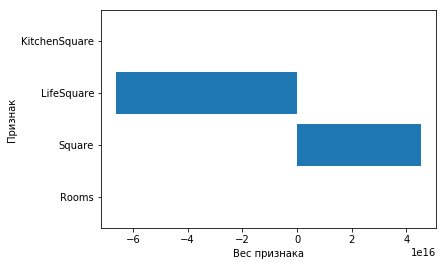

In [187]:
plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [189]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


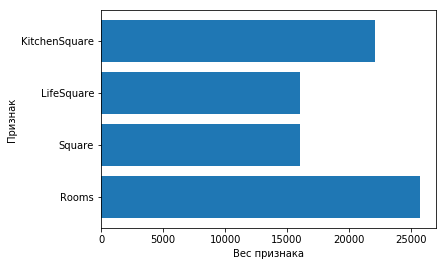

In [238]:
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [239]:
y_pred1 = lr.predict(X_test_scaled)

y_pred1.shape

(2479, 1)

In [240]:
check_test1 = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred1.flatten(),
})

check_test1.head(10)

,y_test,y_pred
1677,315753.0383,275595.449840
9734,185030.5835,145509.572465
7597,449776.1044,289793.572342
275,175868.0820,200783.998263
2578,245847.9810,242863.362306
7166,135953.3986,132403.434261
5040,268191.6151,249121.713751
8906,107067.4276,149759.306433
9110,177116.3397,172574.718428
849,344513.1191,238535.985914


In [241]:
from sklearn.metrics import mean_squared_error

mean_squared_error(check_test1["y_pred"], check_test1["y_test"])

4849256668.423457

In [242]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(check_test1["y_pred"], check_test1["y_test"])

47742.792162863574

In [243]:
X_aim_scaled = scaler.fit_transform(X_aim)
X_aim_scaled = pd.DataFrame(X_aim_scaled, columns=feature_names)

In [244]:
y_aim2 = lr.predict(X_aim_scaled)

y_aim2.shape

(5000, 1)

In [248]:
y_aim2 = pd.DataFrame({"Price":y_aim2.flatten()})

In [249]:
y_aim2.head()

,Price
0,205949.322008
1,227364.194753
2,127718.738915
3,251446.003682
4,160228.583897


In [250]:
y_aim2.to_csv('y_aim2.csv')